### TODO
- Split into visit personas 
    - dropins vs preschool (map visit program)
- Add weather data
    - temp, precip. chance


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose


In [45]:
visits_df = pd.read_csv('../data/visits.csv', parse_dates=['Visit Date', 'Visit Time In', 'Visit Time Out'])
visits_df.head()

,Visit Date,Visit Time In,Visit Time Out,Visit Program
0,2024-12-03,2024-12-03 12:54:00,2024-12-03 12:54:00,C
1,2024-12-03,2024-12-03 12:54:00,2024-12-03 12:54:00,I
2,2024-12-03,2024-12-03 13:43:00,2024-12-03 14:29:00,C
3,2024-12-03,2024-12-03 13:43:00,2024-12-03 14:29:00,I
4,2024-12-05,2024-12-05 16:24:00,2024-12-05 16:24:00,C


### Visualize Visits per Day

In [46]:
visits_per_day_df = visits_df.drop(['Visit Time Out', 'Visit Program'], axis=1).groupby('Visit Date').count().rename({'Visit Time In': 'visits'}, axis=1)
visits_per_day_df.head()

,visits
Visit Date,
2024-12-03,4
2024-12-05,1
2024-12-06,3
2024-12-09,7
2024-12-10,9


In [ ]:
# days with only 1 visit represent owners testing functionality in the system (usually on weekends)
visits_per_day_df = visits_per_day_df.drop(visits_per_day_df[visits_per_day_df['visits'] == 1].index)

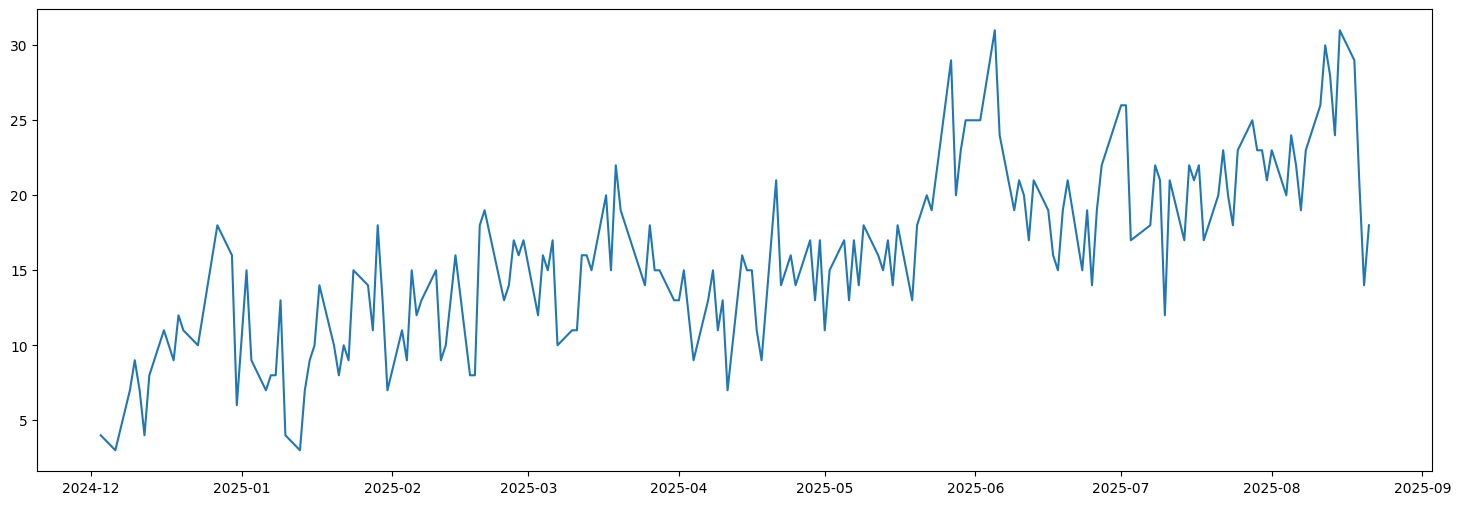

In [43]:
plt.figure(figsize=(18,6))
plt.plot(visits_per_day_df.index, visits_per_day_df['visits']);

Check for seasonality

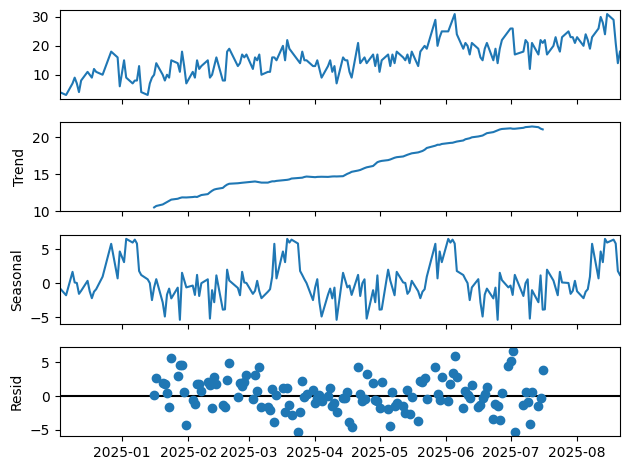

In [44]:
seasonal_decompose(visits_per_day_df, period=52).plot();

### Split into Visit Personas